''

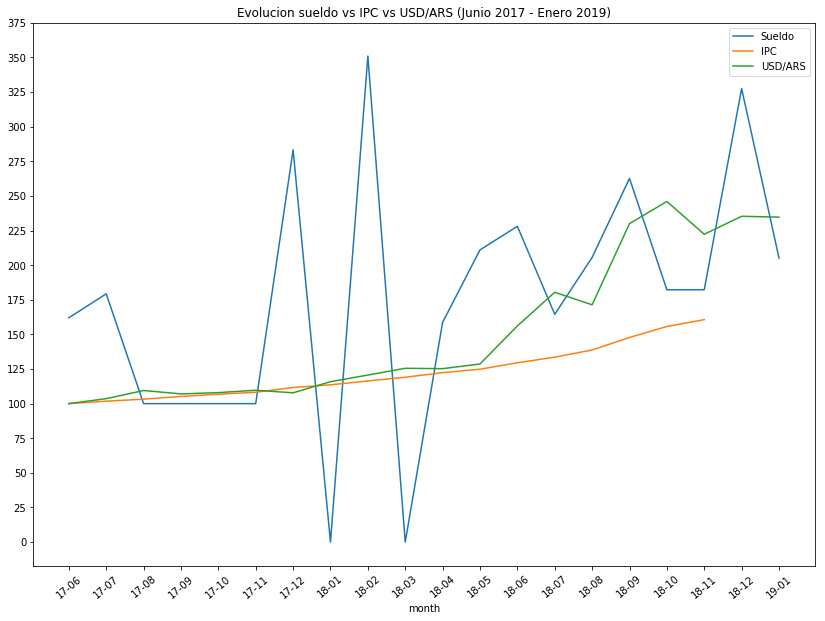

In [1]:
%matplotlib inline
import pandas as pd

df = pd.read_pickle("data/parsed.pkl")

df['month'] = df['date'].apply(lambda x: x.strftime('%y-%m'))

kwargs = dict(
    yticks=range(0, 400, 25), 
    xticks=list(range(df['month'].unique().shape[0])),
    rot=40,
    title='Evolucion sueldo vs IPC vs USD/ARS (Junio 2017 - Enero 2019)',
    figsize=(14, 10),
    legend=True,
)

s = df[df['category'] == 'Sueldo'].groupby(['month']).sum().drop('usd', axis=1)
s['ars'] *= 100.0 / s['ars'].min()
index = ('17-06', '17-07', '17-08', '17-09', '17-10', '17-11', '17-12', '18-01', '18-02', '18-03', '18-04', '18-05', '18-06', '18-07', '18-08', '18-09', '18-10', '18-11', '18-12', '19-01', )
for d in index:
    if not s.index.contains(d):
        s.loc[d] = 0.0
s = s.sort_index()
s['ars'].rename('Sueldo').plot(**kwargs)

# Fuente: https://www.indec.gob.ar/ftp/cuadros/economia/sh_ipc_12_18.xls
ipc = pd.Series([111.8, 113.8, 115.4, 117.6, 119.4, 121.0, 124.8, 127.0, 130.1, 133.1, 136.8, 139.6, 144.8, 149.3, 155.1, 165.2, 174.1, 179.6])
ipc *= 100.0 / ipc.min()
ipc.rename('IPC').plot(**kwargs)

# Fuente: https://finance.yahoo.com/quote/USDARS%3DX/chart?p=USDARS%3DX#eyJpbnRlcnZhbCI6Im1vbnRoIiwicGVyaW9kaWNpdHkiOjEsImNhbmRsZVdpZHRoIjo4LCJ2b2x1bWVVbmRlcmxheSI6dHJ1ZSwiYWRqIjp0cnVlLCJjcm9zc2hhaXIiOnRydWUsImNoYXJ0VHlwZSI6ImxpbmUiLCJleHRlbmRlZCI6ZmFsc2UsIm1hcmtldFNlc3Npb25zIjp7fSwiYWdncmVnYXRpb25UeXBlIjoib2hsYyIsImNoYXJ0U2NhbGUiOiJsaW5lYXIiLCJwYW5lbHMiOnsiY2hhcnQiOnsicGVyY2VudCI6MSwiZGlzcGxheSI6IlVTREFSUz1YIiwiY2hhcnROYW1lIjoiY2hhcnQiLCJ0b3AiOjB9fSwic2V0U3BhbiI6e30sImxpbmVXaWR0aCI6Miwic3RyaXBlZEJhY2tncm91ZCI6dHJ1ZSwiZXZlbnRzIjp0cnVlLCJjb2xvciI6IiMwMDgxZjIiLCJzeW1ib2xzIjpbeyJzeW1ib2wiOiJVU0RBUlM9WCIsInN5bWJvbE9iamVjdCI6eyJzeW1ib2wiOiJVU0RBUlM9WCJ9LCJwZXJpb2RpY2l0eSI6MSwiaW50ZXJ2YWwiOiJtb250aCIsInNldFNwYW4iOnt9fV0sInJhbmdlIjp7fSwic3R1ZGllcyI6eyJ2b2wgdW5kciI6eyJ0eXBlIjoidm9sIHVuZHIiLCJpbnB1dHMiOnsiaWQiOiJ2b2wgdW5kciIsImRpc3BsYXkiOiJ2b2wgdW5kciJ9LCJvdXRwdXRzIjp7IlVwIFZvbHVtZSI6IiMwMGIwNjEiLCJEb3duIFZvbHVtZSI6IiNGRjMzM0EifSwicGFuZWwiOiJjaGFydCIsInBhcmFtZXRlcnMiOnsiaGVpZ2h0UGVyY2VudGFnZSI6MC4yNSwid2lkdGhGYWN0b3IiOjAuNDUsImNoYXJ0TmFtZSI6ImNoYXJ0In19fSwiZXZlbnRNYXAiOnsiY29ycG9yYXRlIjp7ImRpdnMiOnRydWUsInNwbGl0cyI6dHJ1ZX0sInNpZ0RldiI6e319LCJjdXN0b21SYW5nZSI6bnVsbH0%3D
usd = pd.Series([16046,16623,17566,17174,17322,17601,17299,18591,19357,20142,20098,20642,25049,28948,27496,36907,39473,35670,37757,37653])
usd *= 100.0 / usd.min()
usd.rename('USD/ARS').plot(**kwargs)

;

''

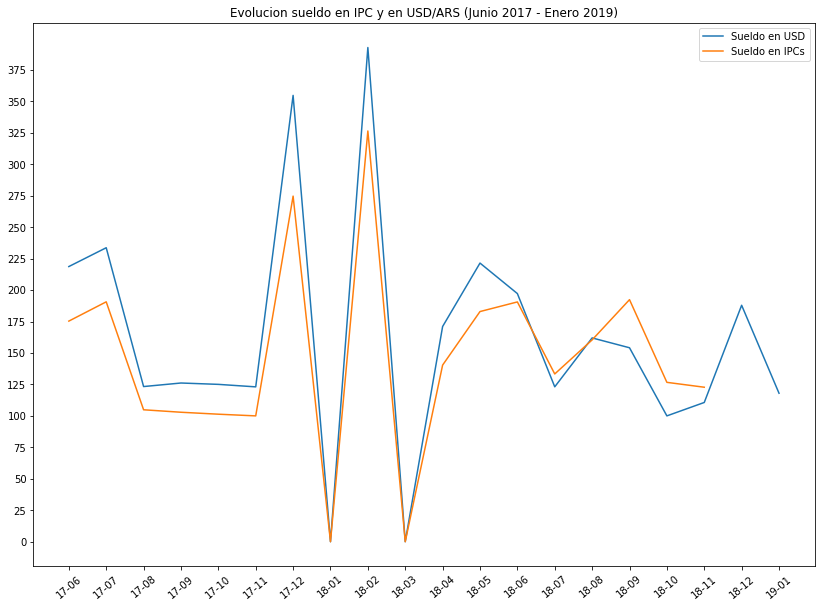

In [2]:
kwargs = dict(
    yticks=range(0, 400, 25), 
    xticks=list(range(df['month'].unique().shape[0])),
    rot=40,
    title='Evolucion sueldo en IPC y en USD/ARS (Junio 2017 - Enero 2019)',
    figsize=(14, 10),
    legend=True,
)

susd = (s.reset_index()['ars'] / usd)
susd *= 100.0 / susd[susd != 0].min()
pd.Series(susd.values, index=index).rename('Sueldo en USD').plot(**kwargs)

sipc = (s.reset_index()['ars'] / ipc)
sipc *= 100.0 / sipc[sipc != 0].min()
pd.Series(sipc.values, index=index).rename('Sueldo en IPCs').plot(**kwargs)

;